#**SPRINT 04 - Configuração do Apache NIFI parte 01**
##**Objetivo da Sprint 04 :**

Após finalizar a **Sprint 01** com as entregas do Dockerfile e do Namenode configurado e operando.\
**Sprint 02** com Dockerfile e as configurações do datanode1 e datanode2, resultando em um cluster HDFS de três máquinas pronto para operação.\
Na **Sprint 03**, criei o primeiro fluxo de dados, levando os dados de uma pasta local para uma pasta dentro do cluster HDFS que fez o papel de um Datalake.\
Agora, na **Sprint 04**, irei trabalhar na segunda parte do fluxo de dados, levando o arquivo do Data lake (HDFS) para dentro de um Data Warehouse (DW) que criarei em PostegreSQL, esse arquivo passará por algumas transformações usando os processors do **Apache Nifi**.


**Entregas esperadas da Sprint de trabalho**

01- Apache NiFi configurado e em funcionamento.\
02- Implementar o peipleine de dados completo. O segundo fluxo de dados irá levar o arquivo do datalake (HDFS) para um DW (PostgreSQL) utilizando o Apache NiFi, submetendo o arquivo a algumas transformações.

**Fases do trabalho:**
* Configurar o processor **GetHDFS** no Apache Nifi.
* Configurar o processor **Base64EncodeContent** no Apache Nifi.
* Configurar o processo **UpdateAttribute** no Apache Nifi.
* Configurar o processor **ConvertRecord** no Apache NiFi.
* Configurar o processor **SplitJson** no Apache NiFi.
* Configurar o processor **ConvertJSONToSQL** no Apache NiFi.
* Configurar o processor **PutSQL** no Apache NiFi.
* Criar e configurar um **Data Warehouse (DW) PostegreSQL**.
* Executar o fluxo, monitorar a esxcuação e o resultado.


---

###**2- Configurando os Processors no Apache Nifi**
**GetHDFS**

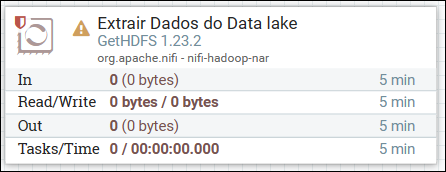


O primeiro processor que configurei nessa segunda etapa de criação do fluxo de dados foi o **GetHDFS**. A configuração dele é semelhante ou melhor identifica a do P **PutHDFS.**




**A- Configuração Processor | GetHDFS | Properties**


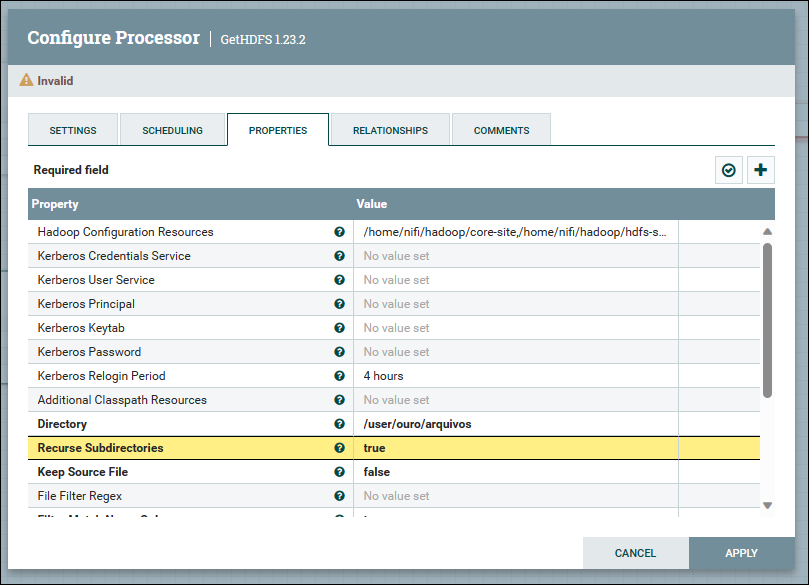

---


###**2.1- Configurando os Processors no Apache Nifi**
**Base64EncodeContent**

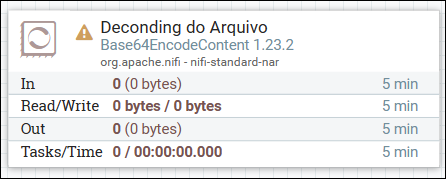

O segundo processador que configurei foi o **Base64EncodeContent**. Após extrair os dados do Data Lake (HDFS), apliquei a primeira transformação, que foi o **encoding.** Isso porque, ao gravar o arquivo em disco, realizei a codificação. Agora, ao ler o arquivo, precisei fazer a decodificação.




**A- Configuração Processor | Base64EncodeContent| Properties**

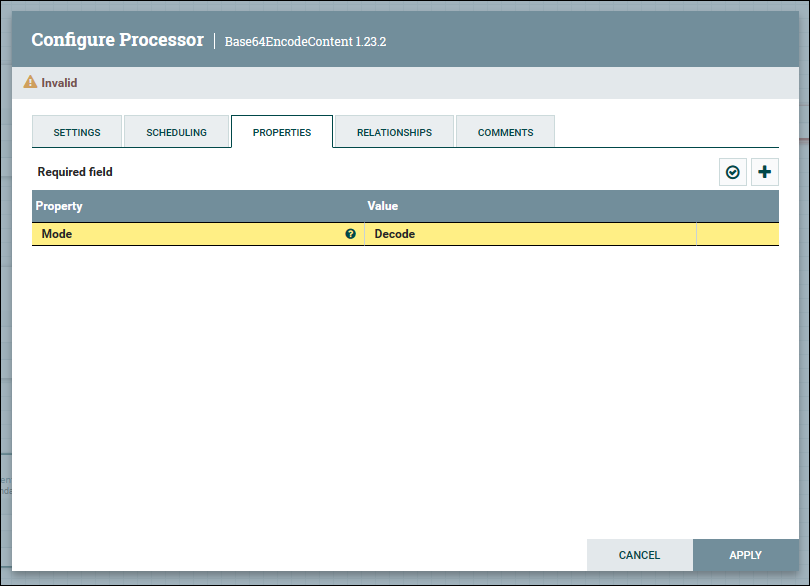



---

###**2.2- Configurando os Processors no Apache Nifi**
**UpdateAttribute**

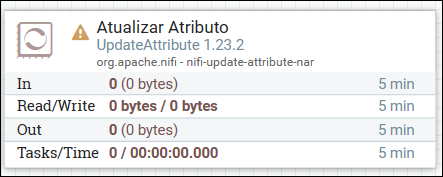

Após configurar os processors **GetHDFS e Base64EncodeContent**, o terceiro processor que configurei foi o **UpdateAttribute.** Com o **UpdateAttribute,** consegui atualizar atributos de um **FlowFile**, incluindo a adição de novos atributos ou a remoção de atributos existentes. Essa ação foi importante para preparar o FlowFile para armazenamento no formato Avro, o que me permitiu processar grandes volumes de dados de forma otimizada.



**A- Configuração Processor | Proprerties | UpdateAttribute**

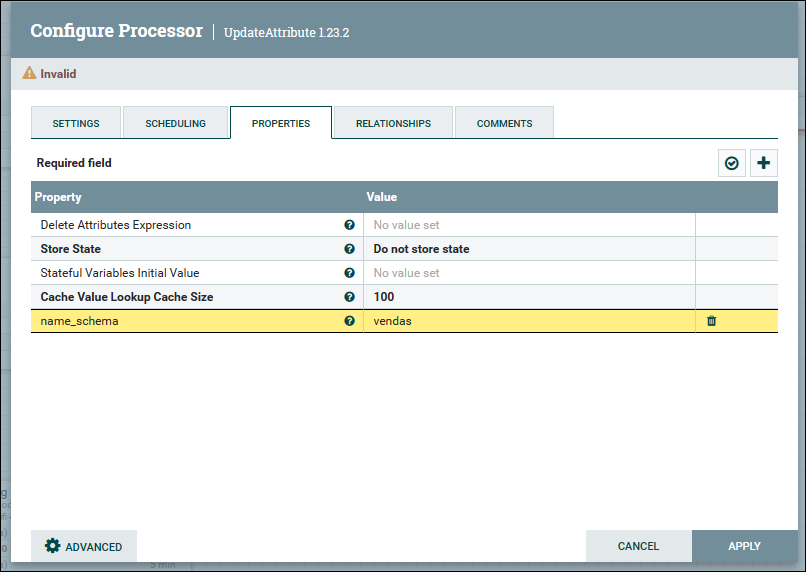


---



###**2.3- Configuração do Processos Apache Nifi**
**Convert Record**

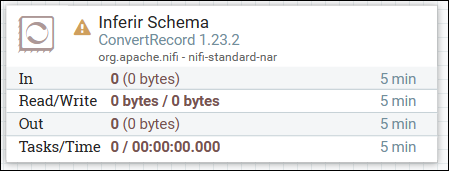

O quarto processor que configurei foi o **Convert Record**. Ele é usado para converter o conteúdo de um **FlowFile** de um formato para outro. Esse processor é particularmente útil quando se lida com diferentes formatos de dados e é necessário realizar transformações entre eles. Com o **"Convert Record"**, é possível definir regras de conversão para mapear os campos e valores de um formato de origem para um formato de destino. Durante a configuração, pude especificar como os campos do formato de origem correspondem aos campos do formato de destino, permitindo assim uma transformação flexível e personalizada.



**A-Configuarção Processor | Convert Record | Properties**


Em properties do **Convert record**, fiz a inferência de entrada e configurei a saída. Para a inferência de entrada, que era o **read**, criei um novo serviço, pois não tinha nenhum disponível naquele momento. Os passos realizados foram os seguintes:

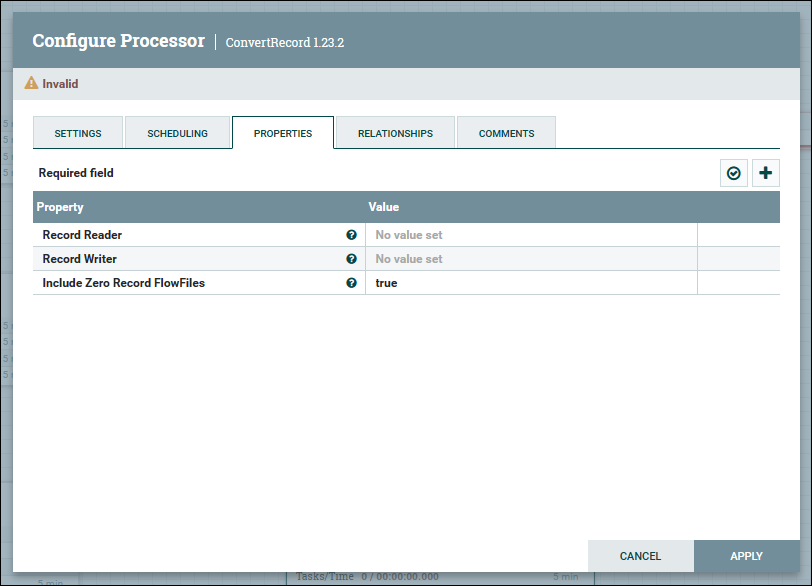


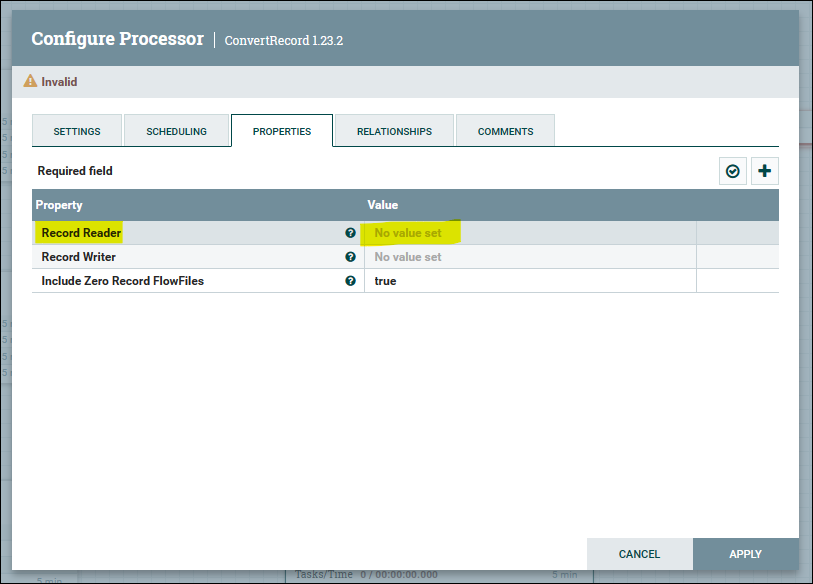


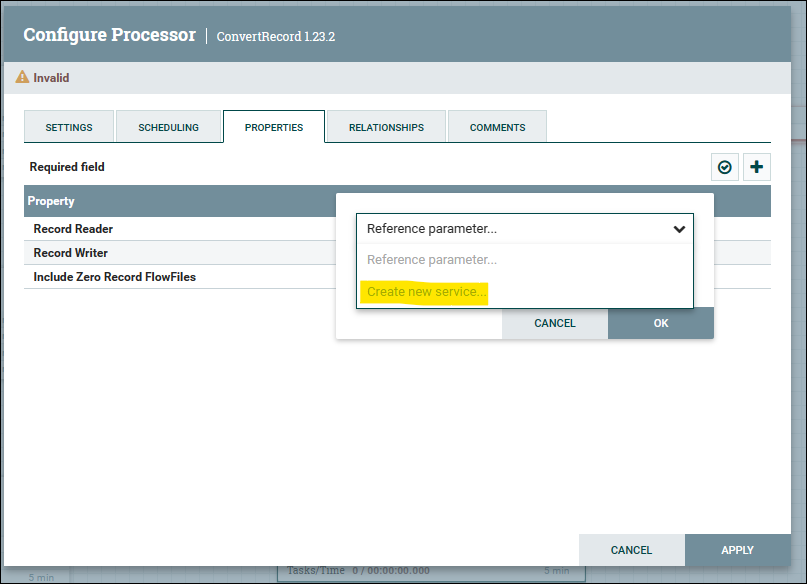

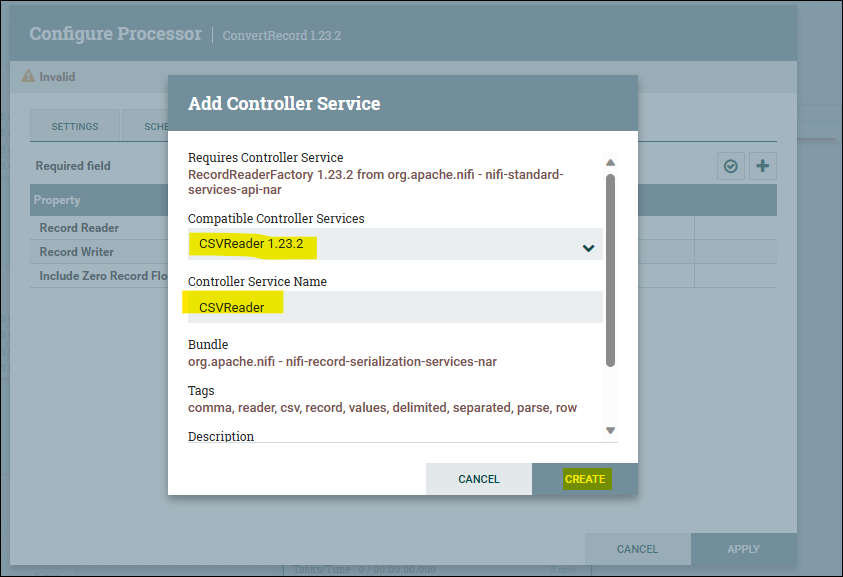

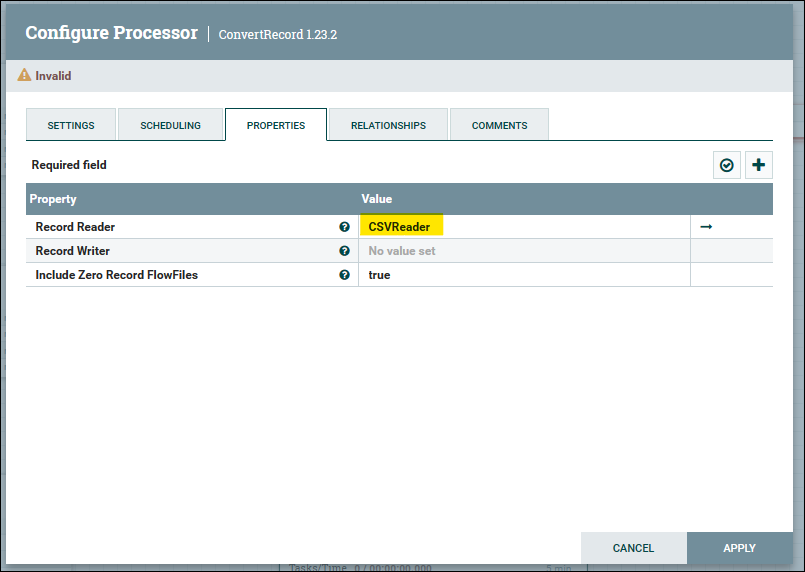


**B-Configuarção Processor | Convert Record| Properties**


Após criar a propriedade **Record Reader**, que corresponde à entrada, tive que ativá-la seguindo os passos abaixo:

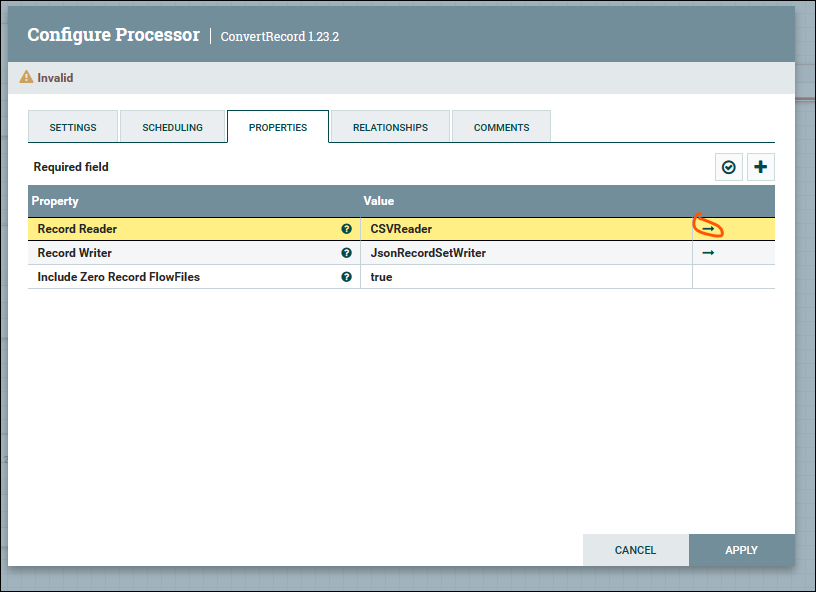


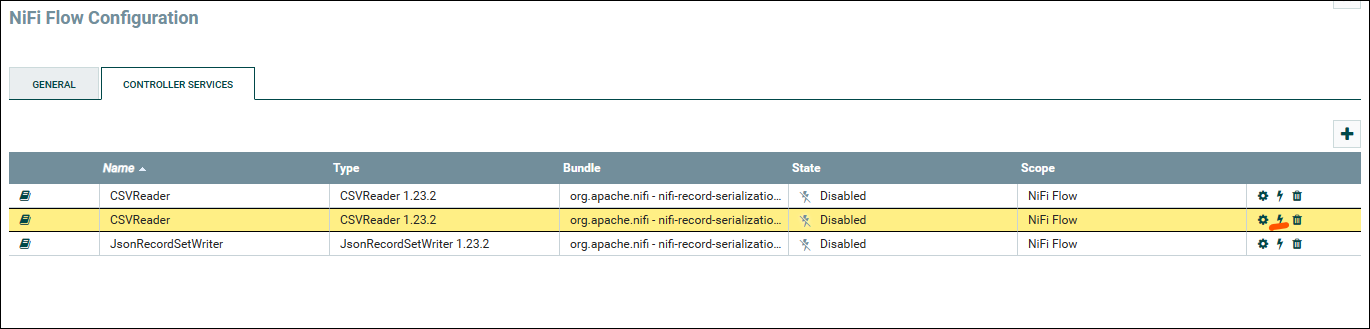



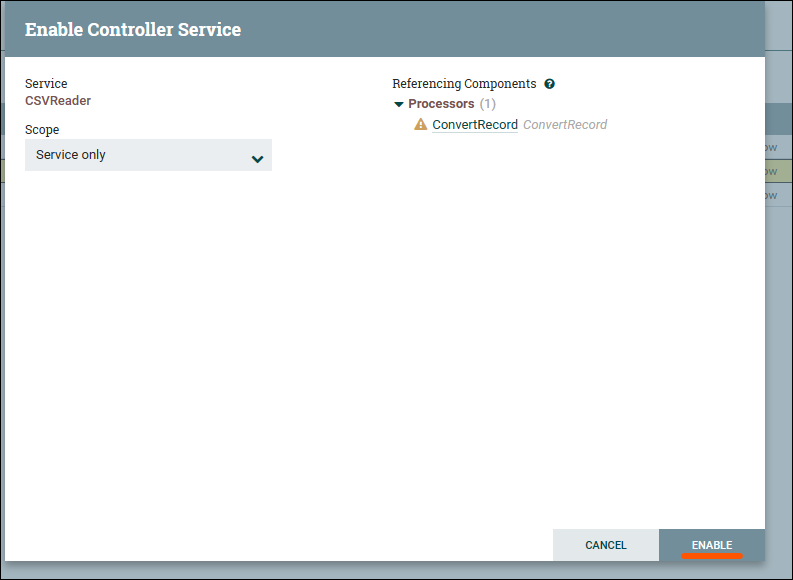

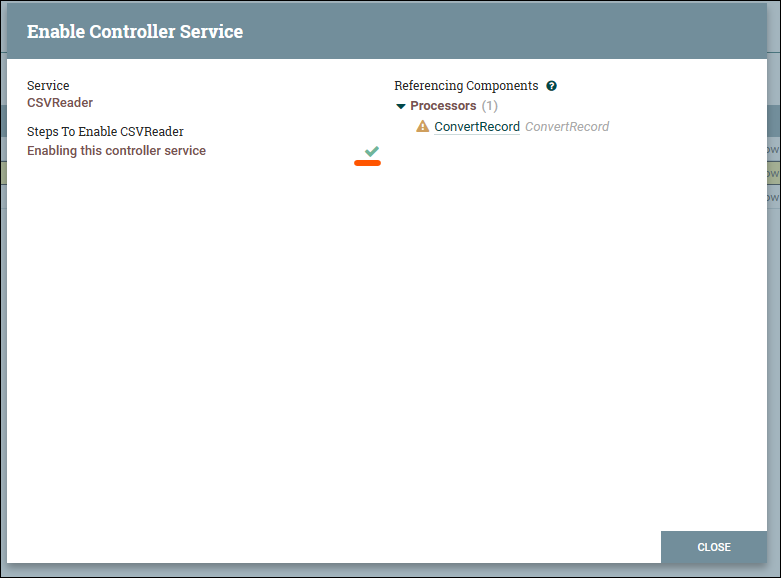


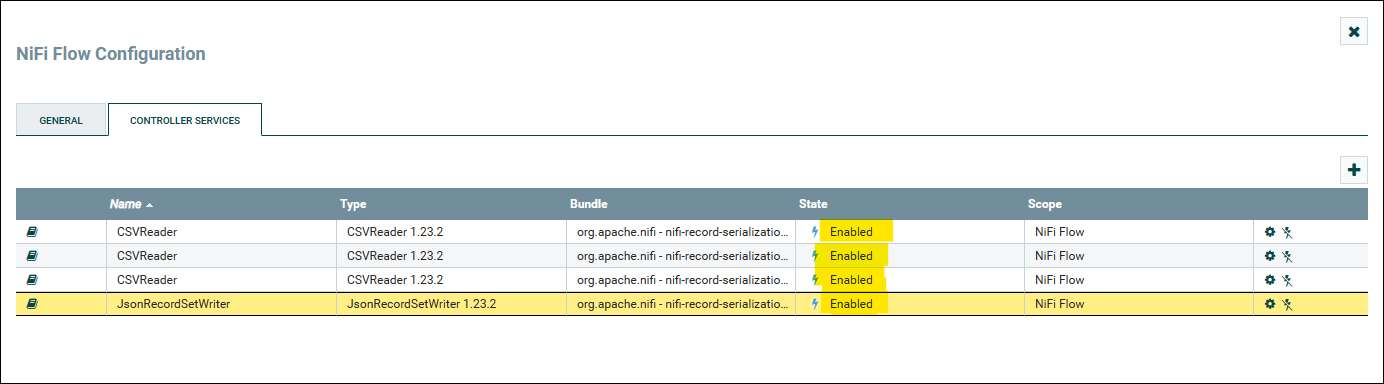

**Todos os controllers services habilitados. Repeti esse mesmo processor de ativação para propriedade Record Writer que é a saida.**

---








###**2.4- Configuração das Propriedades SplitJson**
**SplitJson**


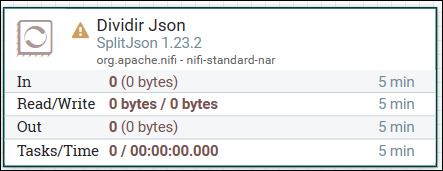

O quinto processor que configurei foi o **SplitJson**, e o que ele fez?  ele foi capaz de dividir um arquivo **JSON** em vários **FlowFiles** separados com base em um elemento de matriz especificado por uma expressão **JsonPath.**

**O JsonPath** é o caminho aonde estará o aqruivo Json, ou seja no Nifi ele vai criar diversos Flowfile que são as estruturas internas do Apache Nifi e isso me pertiu depois converter essas estruturas, ou seja esses pequenos **Flowdiles** em formarto SQL para enviar para o DW.


**A- Configuração Processor | Null Value Representation| Properties**


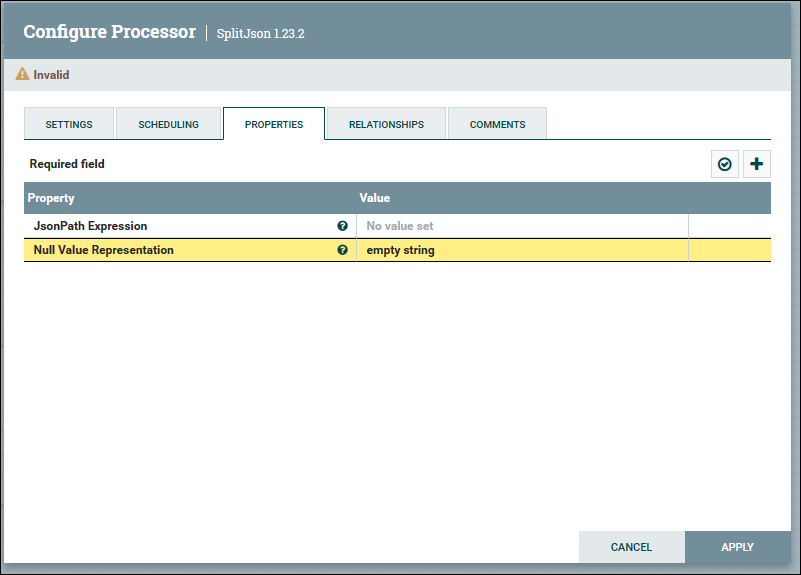

Esse parametro vamos deixar como **empty string**

**B- Configuração Processor | JsonPath Expression | Properties**


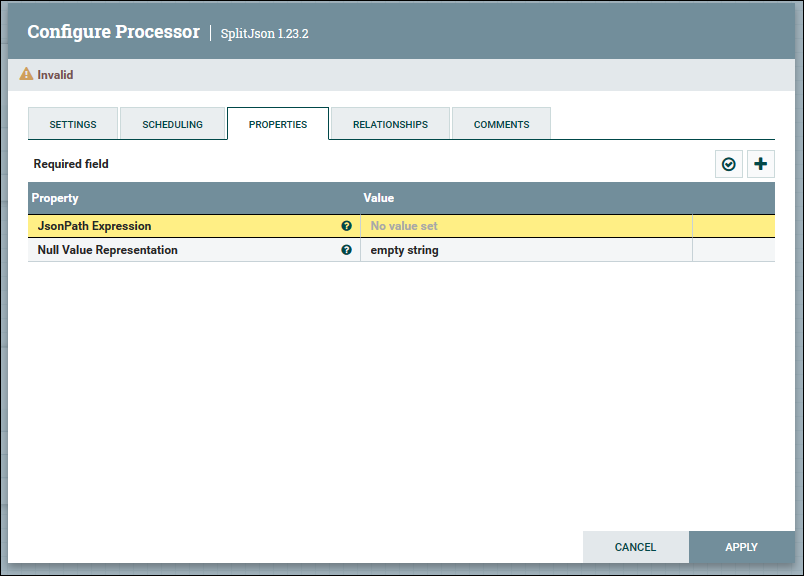

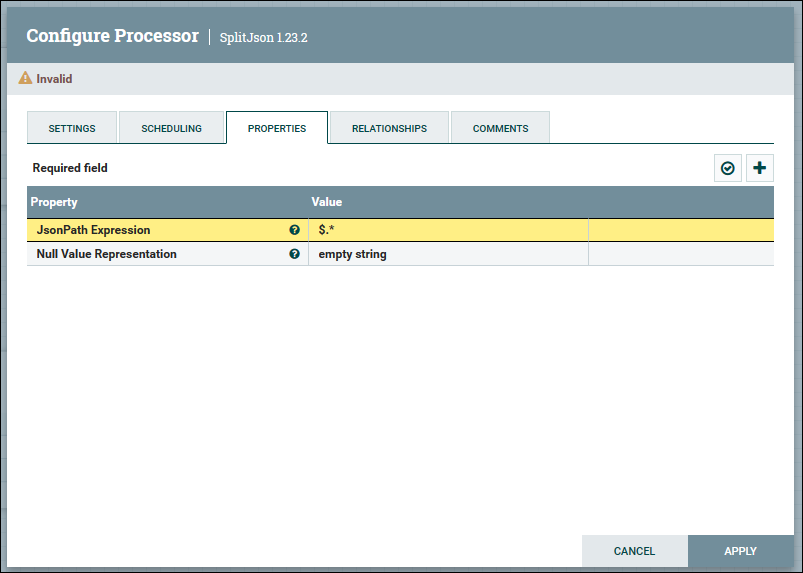


Nessa configuração, eu indiquei o elemento de matriz para realizar a divisão do JSON. Usei **uma expressão regular** para instruir o Apache NiFi a pegar qualquer coisa que estivesse sendo processada durante o fluxo. Nesse caso, ele encontraria um arquivo JSON, exatamente como a conversão que estávamos realizando durante o fluxo. Em seguida, o NiFi pegaria esse arquivo JSON e o dividiria em pequenos FlowFiles, que seriam posteriormente enviados para o Data Warehouse. Eu configurei a expressão regular como **$.*.**

------

###**2.5- Configuração das Propriedades ConvertJSONToSQL**
**ConvertJSONToSQL**


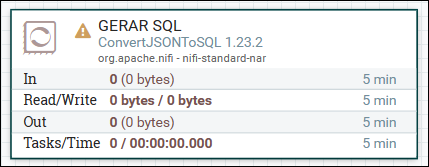


O sexto processor que eu configurei foi **convertJsonToSQ**. Ele Converte um **FlowFile** formatado em **JSON** em uma instrução **SQL UPDATE**, **INSERT** ou **DELETE**. Nesse caso a que eu escolhi foi a **INSERT** por que eu quero inserir no banco de dados pela primeira vez, depois se eu quiser manter esse fluxo recorrente eu poderia escolher o **Update**, ou ter dois processos, um para **Insert** e outro para **Update**. Esse processor

**A- Configuração Processor |Statement Type | Table Name | Properties**


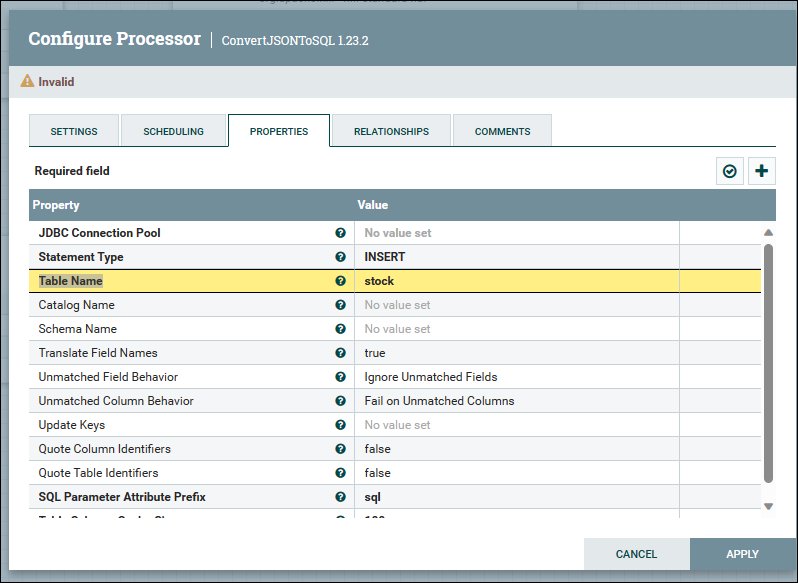

No campo **"Statement Type"**, configurei a instrução **INSERT**, que gerará a instrução SQL com base nos dados recebidos no formato **JSON do FlowFile**.

Em **"Nome da tabela"**, configurei o valor como **"tb_vendas"**, que é o nome da tabela que atribuí ao meu Data Warehouse (DW).

Essas configurações permitiram que o Apache NiFi gerasse automaticamente instruções **SQL INSERT** com base nos dados JSON e as inserisse na tabela chamada "stock" no meu Data Warehouse (DW). Isso foi parte do processo de ingestão, transformação e carregamento de dados realizado pelo NiFi.

**B- Configuração Processor | Properties | JDBC Connection Pool**

Passo para configuração

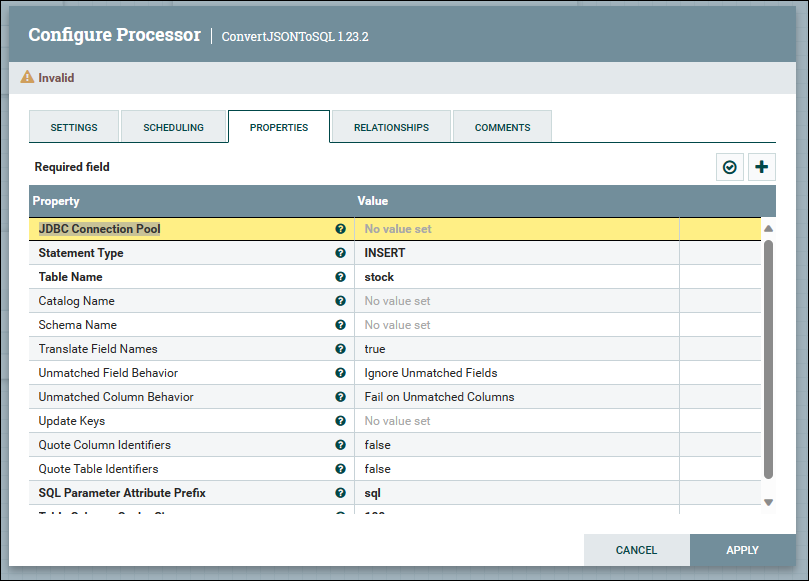


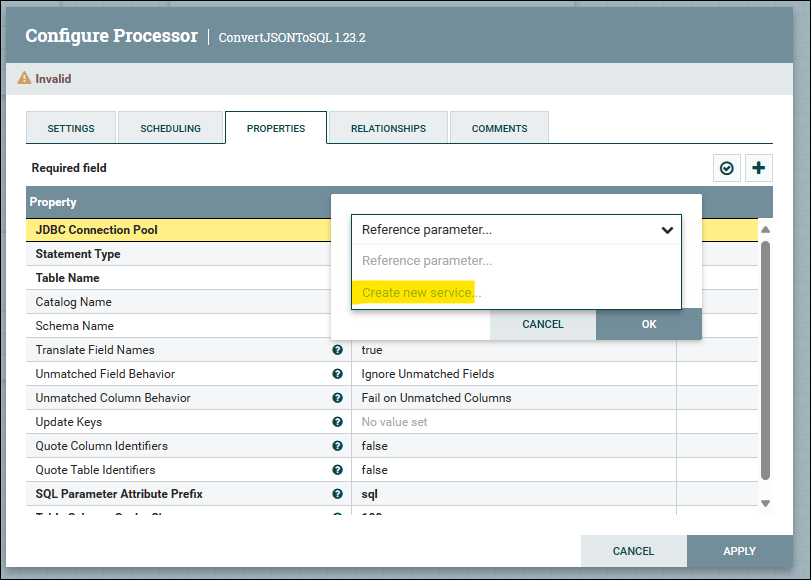

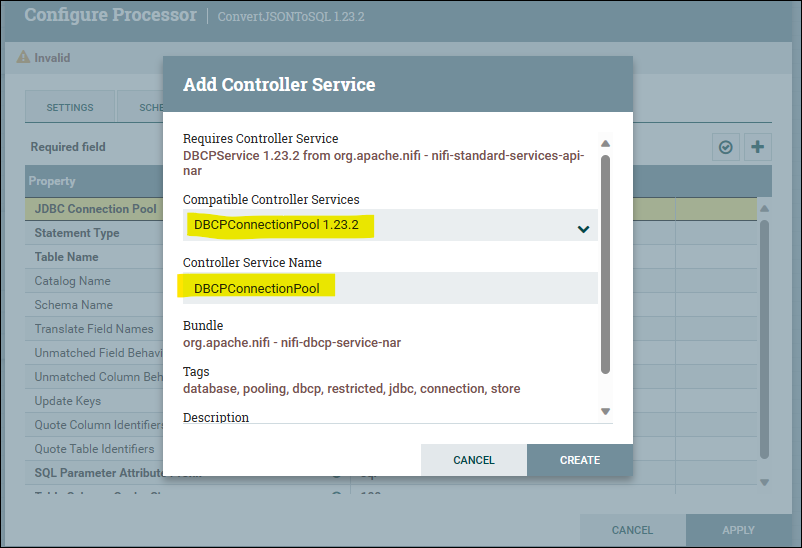

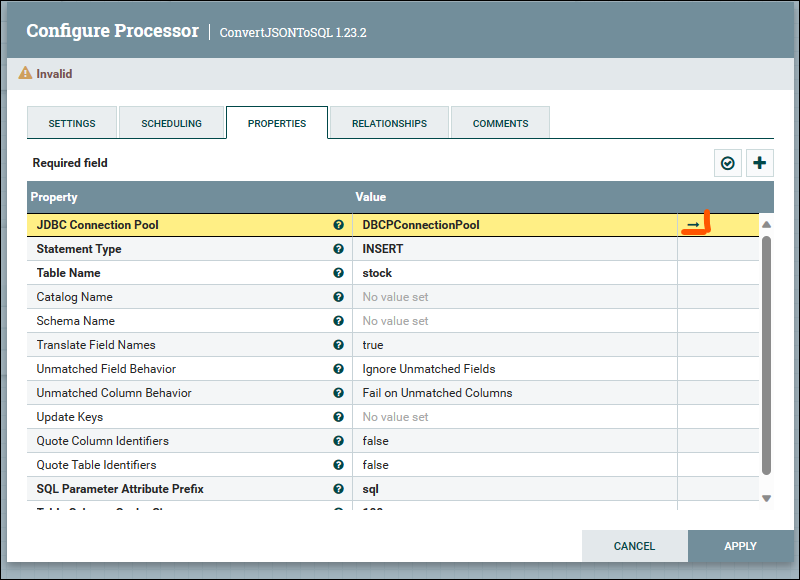

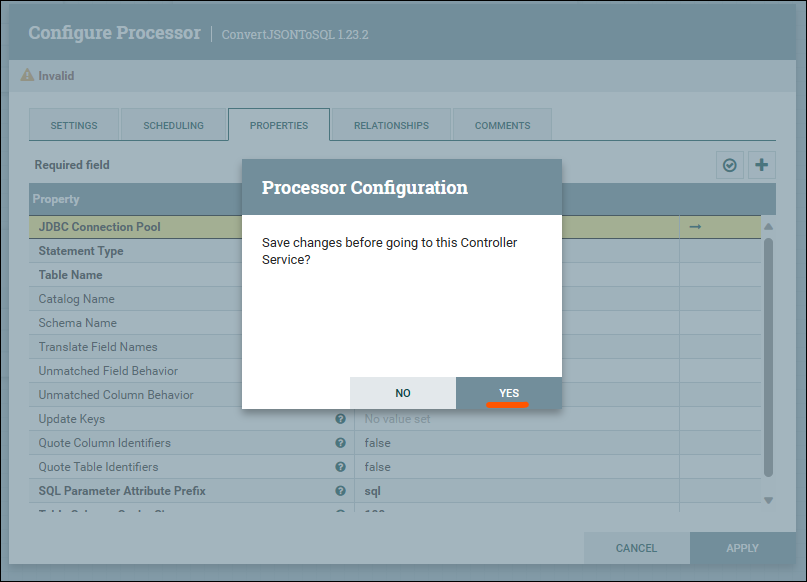


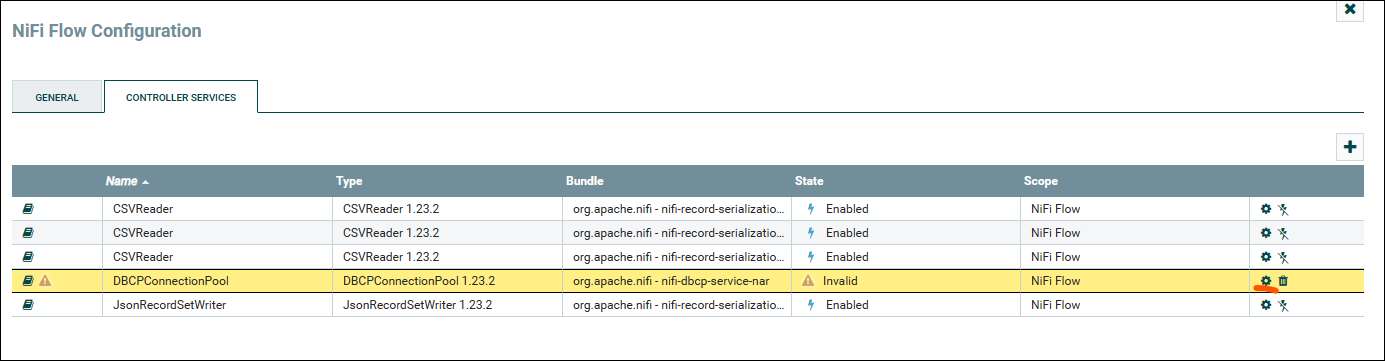

Ao clicar na engrenagem e irei configurar a tela abaixo:

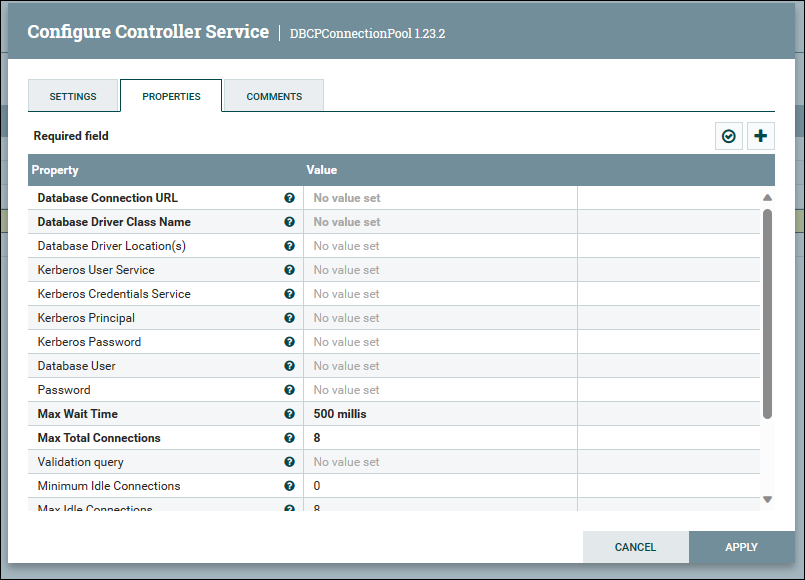


Eu configurei o **JDBC Connection Pool** que permitiu que o NiFi mantivesse um conjunto de conexões de banco de dados pré-abertas e reutilizáveis. Isso foi usado para melhorar o desempenho e a eficiência ao interagir com bancos de dados, como parte do processo de ingestão, transformação e carregamento (ETL) de dados.



**C- Configuração Processor | Properties**\
**|Database Connection URL|**\
**|Database Driver Class Name|**\
**|Database Driver Location|**\
**|Database User|**\
**|Password|**

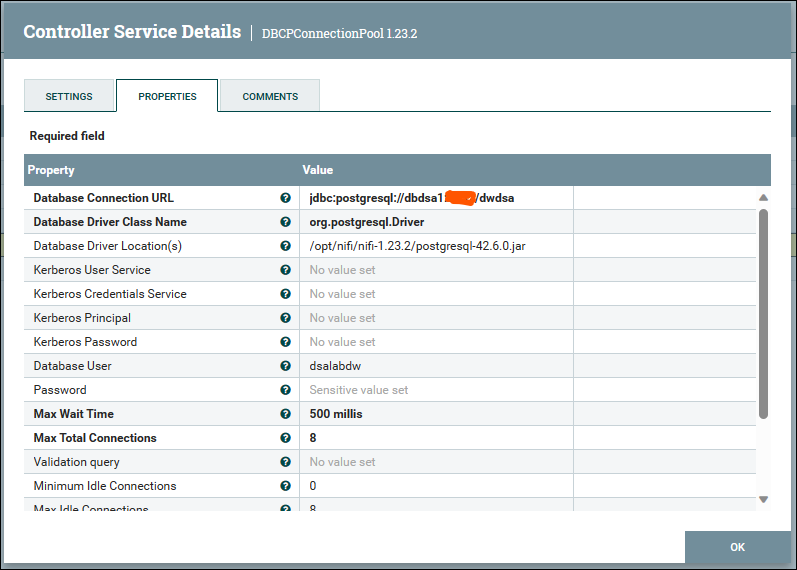

**Database Connection URL**\
Usei o comando **jdbc:postgresql://dbdsa1:xxxx/dwdsa** para essa configuração. Essa URL de conexão JDBC estava configurada para conectar-se a um servidor PostgreSQL hospedado no host "dbdsa1", na porta XXXX, e acessar o banco de dados "dwdsa". Isso permitiu que o Apache NiFi estabelecesse uma conexão com esse banco de dados para ler ou gravar dados, dependendo da configuração do fluxo de dados.

**Database Driver Class Name**\
Usei a classe **org.postgresql.Driver** para permitir que o Apache NiFi se comunicasse com um banco de dados PostgreSQL. Quando configurei uma conexão JDBC no NiFi, precisei especificar o driver JDBC apropriado para o banco de dados com o qual desejava interagir. O driver JDBC foi responsável por traduzir as solicitações feitas pelo NiFi para um formato compreensível pelo PostgreSQL e vice-versa, facilitando a comunicação entre o NiFi e o banco de dados.

**Database Driver Location**\
Eu usei o caminho "/ opt/nifi/nifi-1.23.2/postgresql-42.6.0.jar"na configuração de "Database Driver Location(s)" para indicar ao Apache NiFi onde encontrar o arquivo JAR do driver JDBC necessário para se comunicar com o banco de dados PostgreSQL. Nesse caso, o arquivo **JAR "postgresql-42.6.0.jar"** continha o driver JDBC específico para o PostgreSQL na versão 42.6.0.

Minha escolha desse caminho específico dependeu da localização em que o arquivo **JAR do driver JDBC** estava armazenado no sistema de arquivos do servidor **Apache NiFi**. Pôde variar dependendo de como o Apache NiFi foi instalado e configurado no ambiente.

Essa configuração permitiu que o NiFi soubesse onde encontrar o driver JDBC para PostgreSQL e o utilizasse para estabelecer conexões com o banco de dados quando necessário, como parte dos processos de ingestão, transformação e carregamento (ETL) de dados. Certificar-me de que o NiFi tinha acesso ao **driver JDBC** apropriado era essencial para a comunicação bem-sucedida com o banco de dados PostgreSQL.

**Database User**\
Usei o nome do banco de dados que criei com um container

**Password**\
Usei a senha desse banco de dados

----

###**2.6- Configuração das Propriedades PutSQL**
**PutSQL**


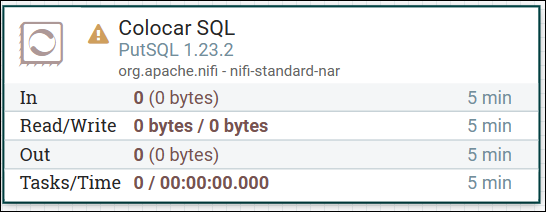

O Sétimo processo que eu configurei foi o **PutSQL**.
Eu usei o processor PutSQL no Apache NiFi para executar instruções SQL em um banco de dados. Eu o utilizei principalmente para inserir, atualizar, excluir ou consultar dados em um banco de dados relacional. **O PutSQL** desempenhou um papel fundamental nas operações de **ETL (Extração, Transformação e Carga) de dados que eu estava realizando**. Isso envolveu a extração de dados de uma fonte, aplicando transformações conforme necessário e, em seguida, carregando esses dados em um banco de dados de destino. Foi uma parte essencial do fluxo de dados que eu estava gerenciando.

**A- Configuração Processor | JDBC Connection Pool | Properties**

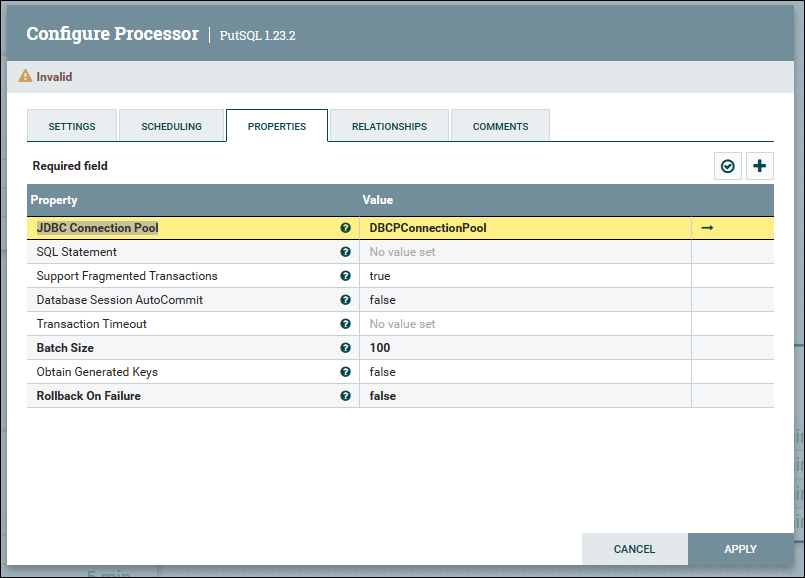

Usei o DBCPConnectionPool para gerenciar conexões de banco de dados e executar instruções SQL no banco de dados configurado. Isso foi particularmente útil em cenários de ETL, onde tive várias operações de banco de dados que precisavam ser executadas de maneira eficiente. A reutilização de conexões de banco de dados ajudou a reduzir a sobrecarga de abrir e fechar conexões repetidamente, melhorando o desempenho do processo de ingestão, transformação e carregamento de dados.


**B- Configuração Processor | Output Port | Properties**


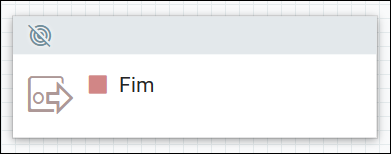

 Por fim, trouxe uma porta de saída para rotear os dados processados de maneira eficiente para os destinos corretos, neste caso, o destino final.


----

###**2.7- Fazendo a conexão entre os processors.**

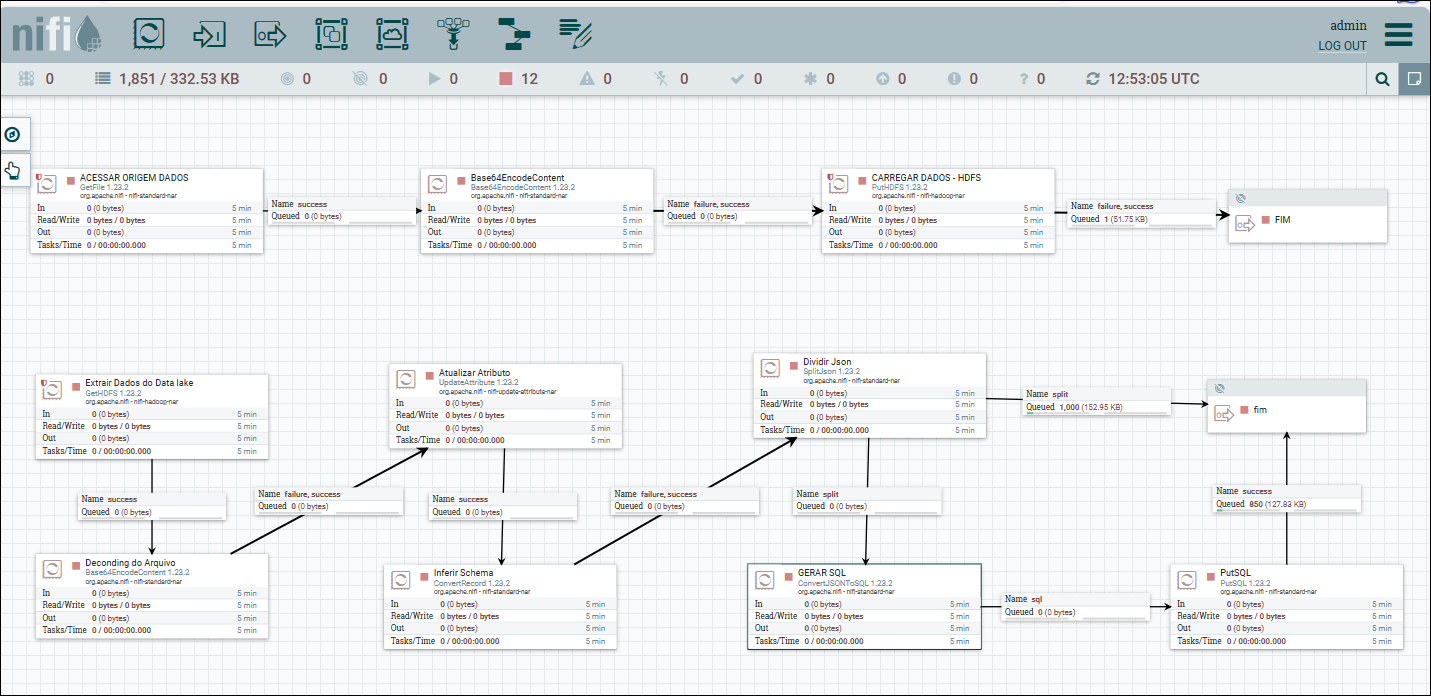

Com todos os processors configurado fiz as conexões entre eles.

A conexão entre os processors é uma parte importante do Apache NiFi para integrar e automatizar fluxos de dados.


###**2.8- Criar e configurar um Data Warehouse (DW) Postegre.**

Após criar os processors e conectá-los, chegou o momento de fazer o fluxo de dados chegar ao meu Data Warehouse (DW). Utilizei o SGBD PostgreSQL como meu DW, para que os dados extraídos da máquina local com o Apache NiFi fossem armazenados no Data Lake (HDFS), transformados e carregados com o Apache NiFi e finalmente chegassem ao DW. O processo de integração e carga de dados foi realizado com sucesso, permitindo que os dados fluíssem de forma eficiente de uma ponta à outra do meu sistema de dados.

**Etapas realizadas**
* Download do Pgadmin;
* Preparação do container Docker para o Banco de Dados do DW;
* Conexão do Servidor Pgadmim com o container Docker para o banco de Dados do DW;
* Criação de uma tabela para receber os dados que serão carregados.

---

###**3 - Ativação do Pipeline no Apache Nifi e Monitoramento do resultado**

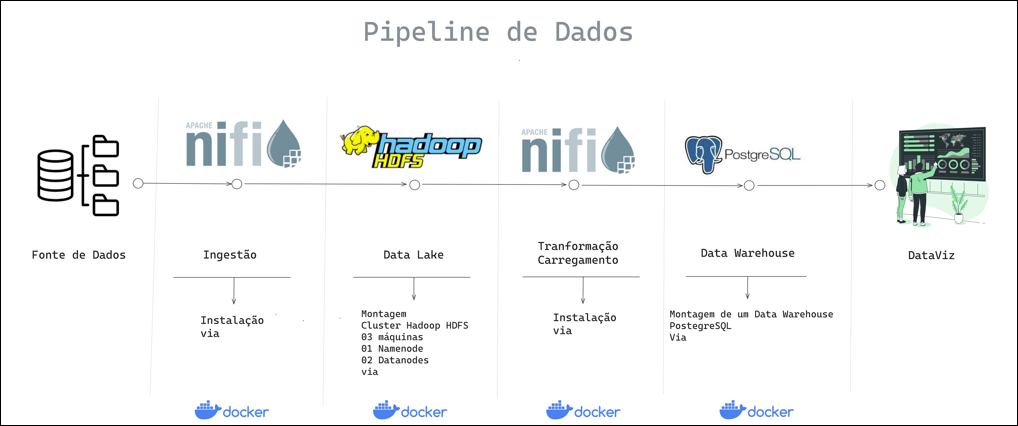

Após todo o processo de configuração, chegou o momento de verificar a execução do pipeline de dados via Apache NiFi. O NiFi extrairá os dados de uma pasta dentro do servidor NiFi, os transferirá para o Apache Hadoop HDFS e, em seguida, removerá esse arquivo do HDFS, que atua como um Data Lake. Em seguida, ele executará processos de transformação e carregamento no Data Warehouse - PostgreSQL, finalizando o processo. Os dados estarão prontos para análise nesse ponto.


**01- Arquivo em ambiente Local**

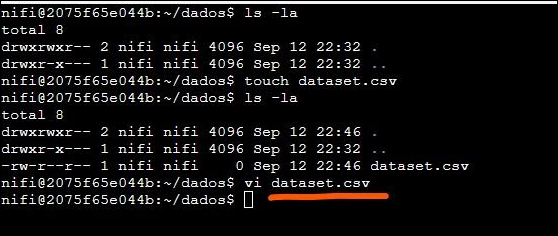

**02- Local dentro Apache Hadoop HDFS (Data Lake) que receberá o arquivo colocado pelo Apache Nifi**

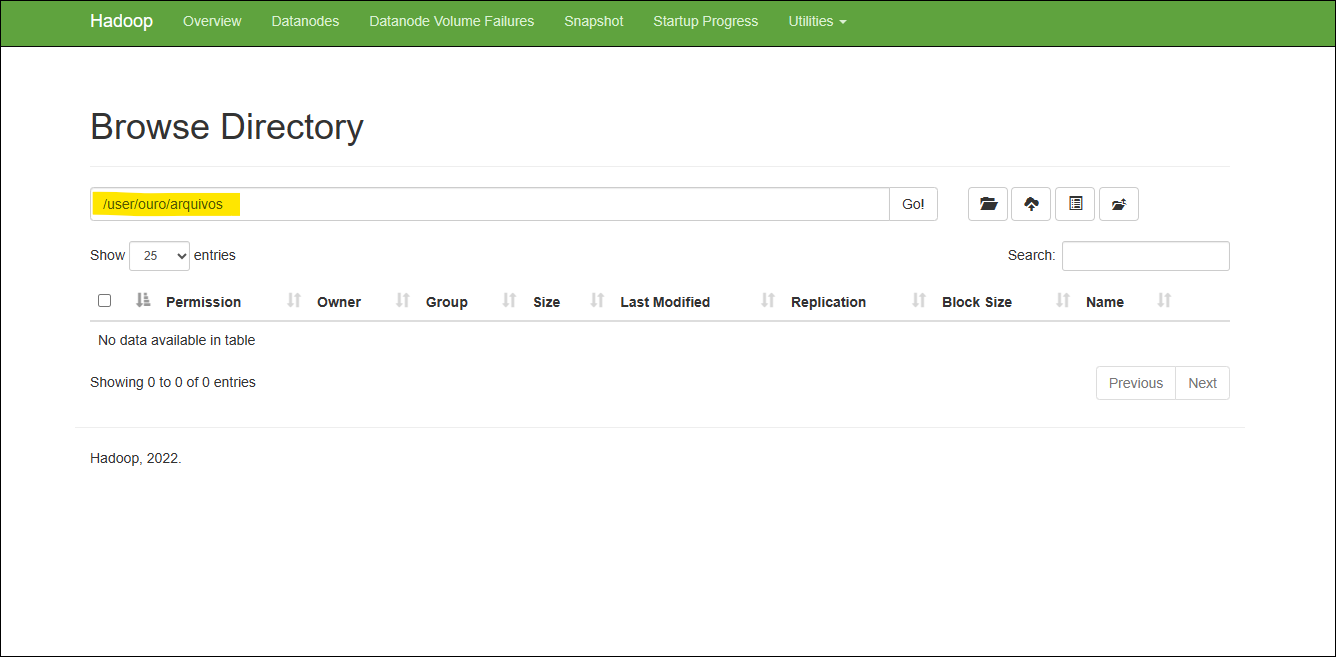

**03- Fluxo de Tranformação, carregamento | Apache Nifi em Execuação**

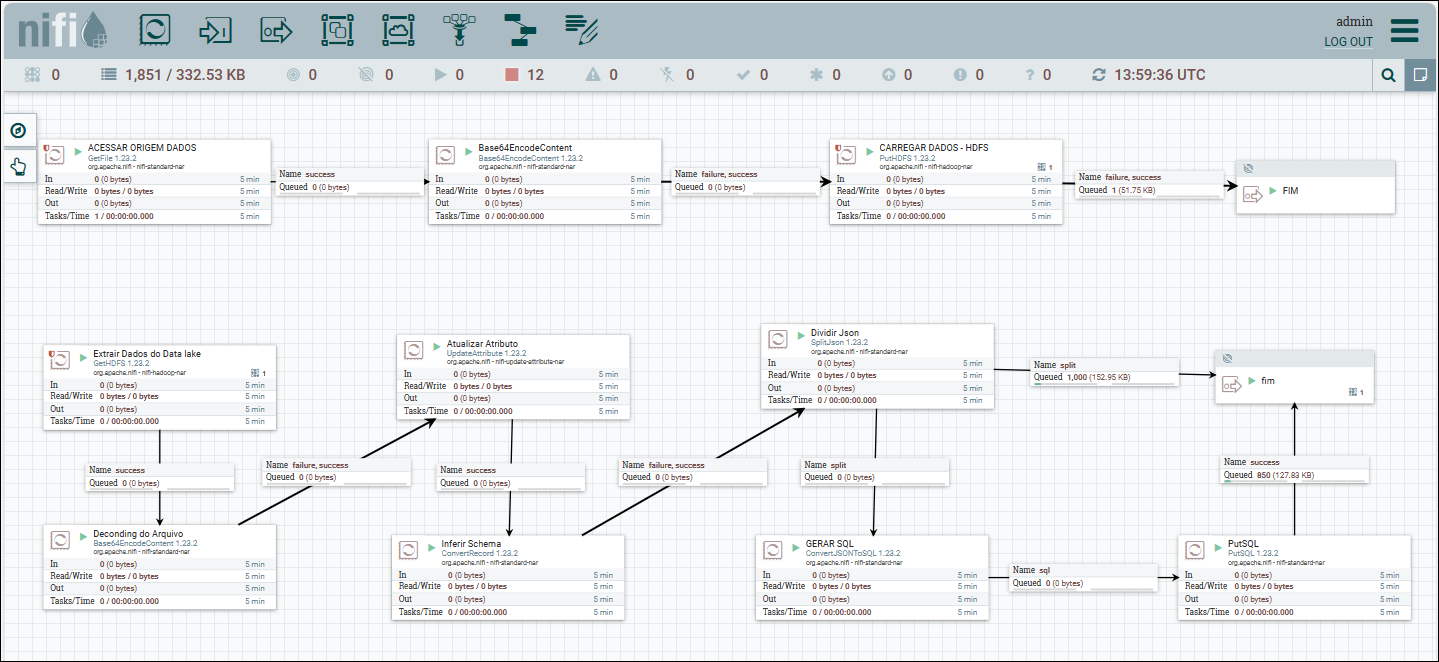

**05 - Dados que foram transformados e carregados prontos para análise no PostgreSQL que atua como DW.**

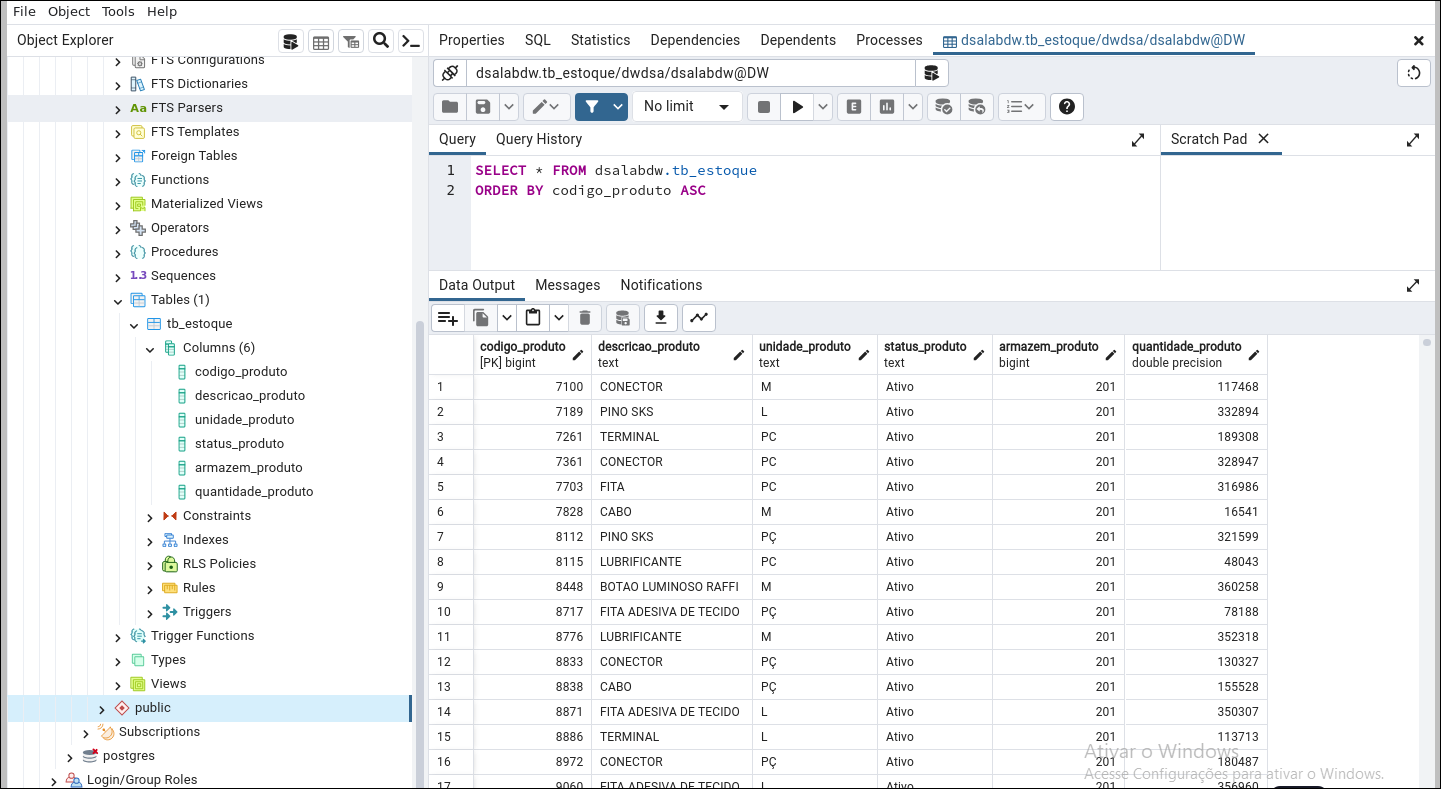

